<a href="https://colab.research.google.com/github/joncalle/ML2/blob/main/Marketing_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group - 10

Danielle do Val Goncalves Tudeia - W0823569

Fernanda Barbieri de Camargo - W0825882

Jonathan Calle - W0825959

Jonathan Chukwuma Oteh - W0775057

Luis Patricio Ramirez Fernandez - W0811391

In [1]:
!pip install rfpimp
!pip install category_encoders
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=af25fb8fcab6273e20c52fad833b3bacf6300138fa6d71f673b00f6f70fa2e89
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6

In [2]:
# Import all the modules that were used in this project
import numpy as np
import pandas as pd
import warnings
from rfpimp import *
import seaborn as sns
import category_encoders as ce
from sklearn import tree
from pandas.api.types import is_string_dtype, is_object_dtype, is_categorical_dtype, is_string_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [3]:
file_path = "/content/drive/MyDrive/Business Analytics/Customer_Behavior_Data.csv"

try:
    df = pd.read_csv(file_path)
    # You can work with the 'df' DataFrame here
except pd.errors.ParserError as e:
    print(f"CSV parsing error: {e}")

CSV parsing error: Error tokenizing data. C error: Expected 4 fields in line 3, saw 5



In [4]:
df = pd.read_csv("/content/drive/MyDrive/Business Analytics/Customer_Behavior_Data.csv", delimiter=';')
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [5]:
df.head().T

,0,1,2,3,4
account length,128,107,137,84,75
location code,415,415,415,408,415
user id,3824657,3717191,3581921,3759999,3306626
credit card info save,no,no,no,yes,yes
push status,yes,yes,no,no,no
add to wishlist,25,26,0,0,0
desktop sessions,265,162,243,299,167
app sessions,45,27,41,51,28
desktop transactions,17,17,10,5,13
total product detail views,110,123,114,71,113


In [6]:
df.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [7]:
df.columns = df.columns.str.replace(' ', '_')

df.columns

Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')

In [8]:
#  Rename columns labels and make them lowercase
df.columns = df.columns.str.lower()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account_length                       3333 non-null   int64 
 1   location_code                        3333 non-null   int64 
 2   user_id                              3333 non-null   int64 
 3   credit_card_info_save                3333 non-null   object
 4   push_status                          3333 non-null   object
 5   add_to_wishlist                      3333 non-null   int64 
 6   desktop_sessions                     3333 non-null   int64 
 7   app_sessions                         3333 non-null   int64 
 8   desktop_transactions                 3333 non-null   int64 
 9   total_product_detail_views           3333 non-null   int64 
 10  session_duration                     3333 non-null   int64 
 11  promotion_clicks                     3333 n

In [10]:
df.head()

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [11]:
# changing the data-type of the 4 columns to float
df['avg_order_value'] = df['avg_order_value'].replace(',','.', regex=True).astype(float)
df['discount_rate_per_visited_products'] = df['discount_rate_per_visited_products'].replace(',','.', regex=True).astype(float)
df['add_to_cart_per_session'] = df['add_to_cart_per_session'].replace(',','.', regex=True).astype(float)
df['product_detail_view_per_app_session'] = df['product_detail_view_per_app_session'].replace(',','.', regex=True).astype(float)

df.dtypes

account_length                           int64
location_code                            int64
user_id                                  int64
credit_card_info_save                   object
push_status                             object
add_to_wishlist                          int64
desktop_sessions                         int64
app_sessions                             int64
desktop_transactions                     int64
total_product_detail_views               int64
session_duration                         int64
promotion_clicks                         int64
avg_order_value                        float64
sale_product_views                       int64
discount_rate_per_visited_products     float64
product_detail_view_per_app_session    float64
app_transactions                         int64
add_to_cart_per_session                float64
customer_service_calls                   int64
churn                                    int64
dtype: object

Statistical Analysis

Are there missing values in the data? (see .info() results) so we can move on and check our descriptive statistics with the .describe() function.

In [12]:
df.describe()

,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [13]:
# descriptive statistics for non-numeric columns
df.describe(exclude= np.number)

,credit_card_info_save,push_status
count,3333,3333
unique,2,2
top,no,no
freq,3010,2411


In [14]:
duplicates = df[df.duplicated()]
print("Number of duplicate records:", duplicates.shape[0])

Number of duplicate records: 0


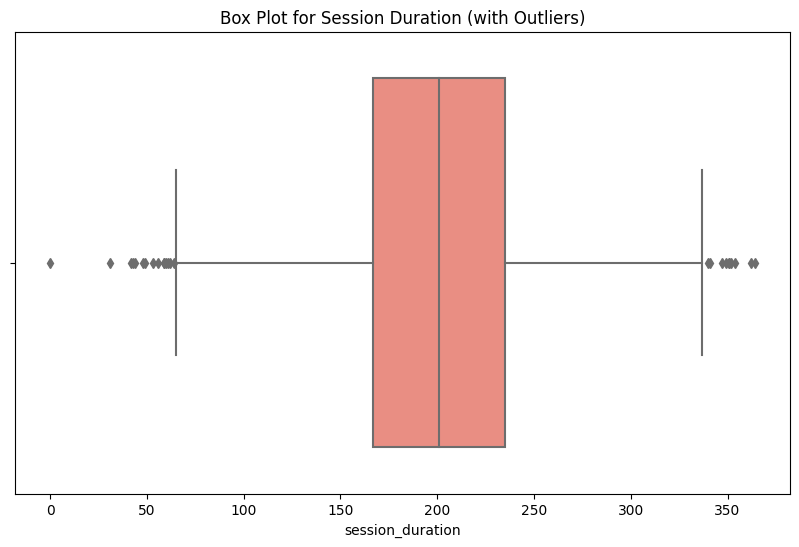

Number of outliers in 'session duration': 25


In [15]:
#calculate quartiles and IQR for the 'session_duration' column
Q1 = df['session_duration'].quantile(0.25)
Q3 = df['session_duration'].quantile(0.75)
IQR = Q3 - Q1
# define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identify and filter outliers
outliers = df[(df['session_duration'] < lower_bound) | (df['session_duration'] > upper_bound)]

# Create a box plot to visualize outliers in 'session_duration'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['session_duration'], color='salmon')
plt.title("Box Plot for Session Duration (with Outliers)")
plt.show()

# Count the number of outliers
outliers_count = outliers.shape[0]
print("Number of outliers in 'session duration':", outliers_count)

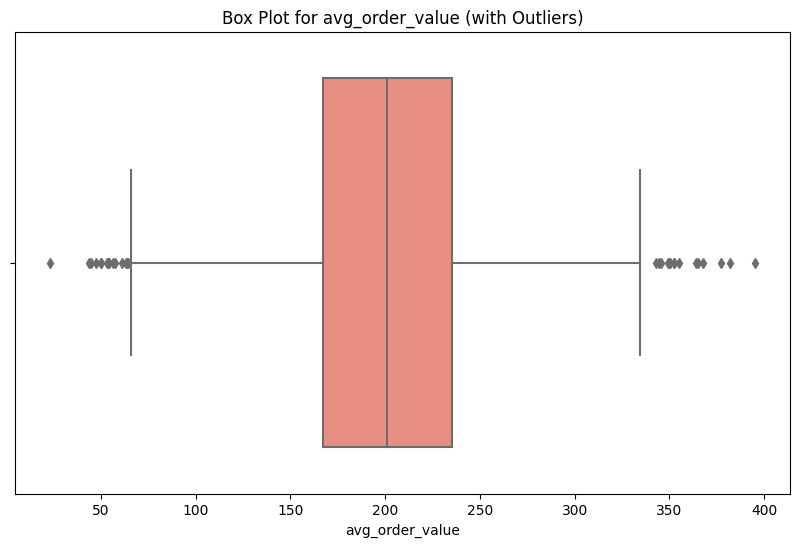

Number of outliers in avg_order_value: 30


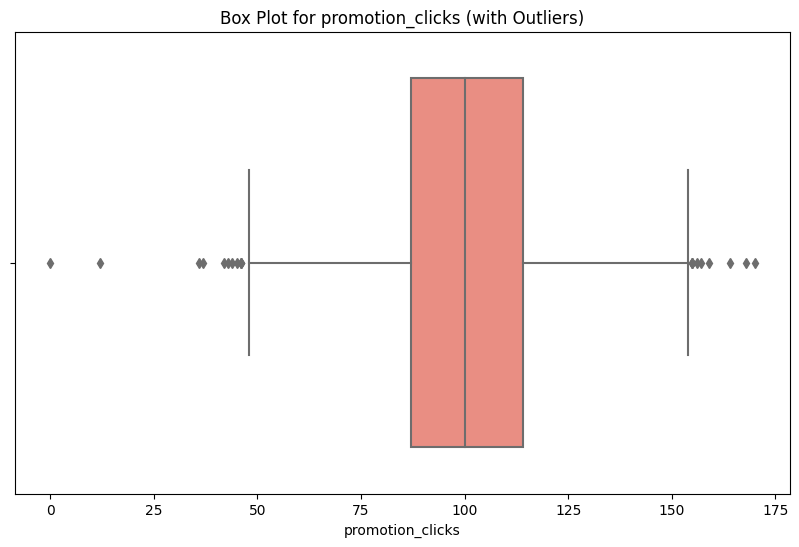

Number of outliers in promotion_clicks: 20


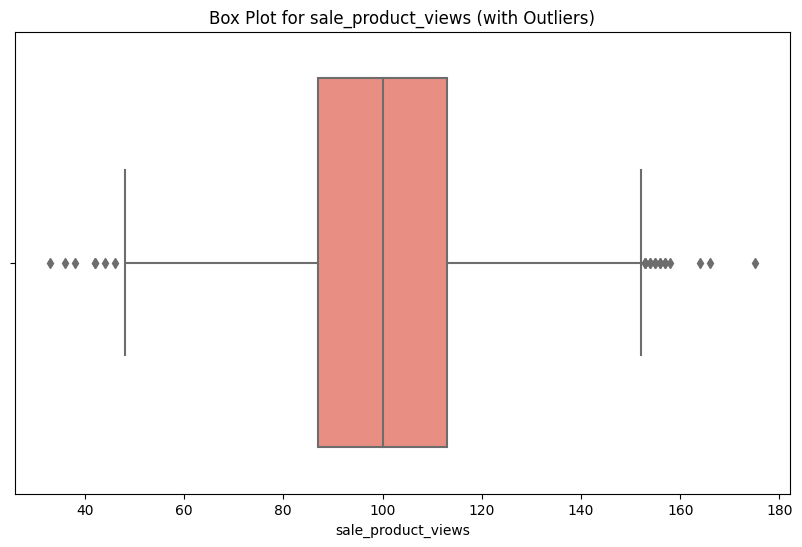

Number of outliers in sale_product_views: 22


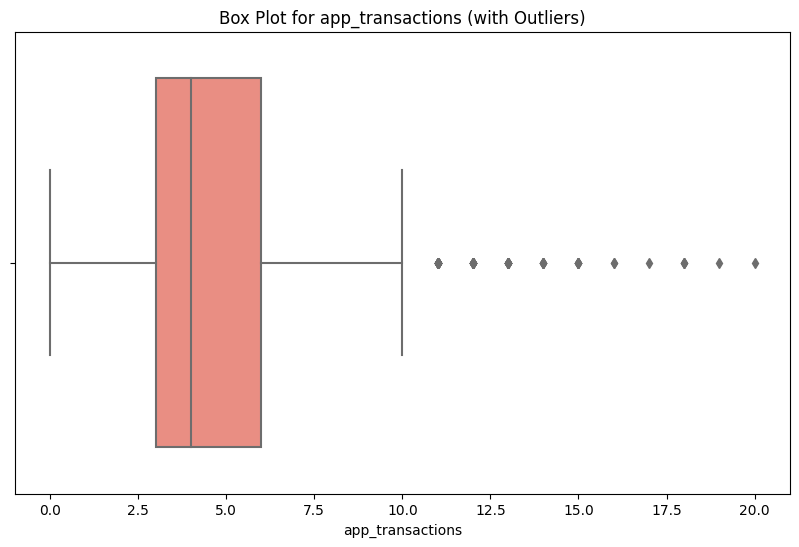

Number of outliers in app_transactions: 78


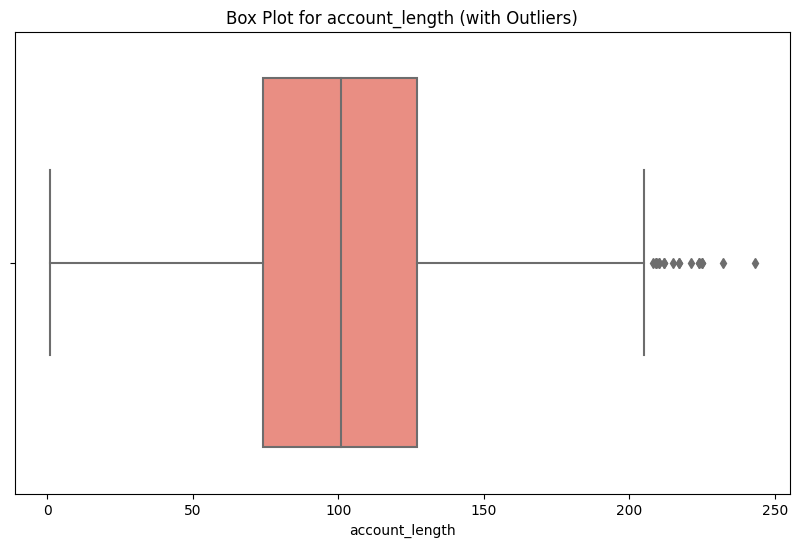

Number of outliers in account_length: 18


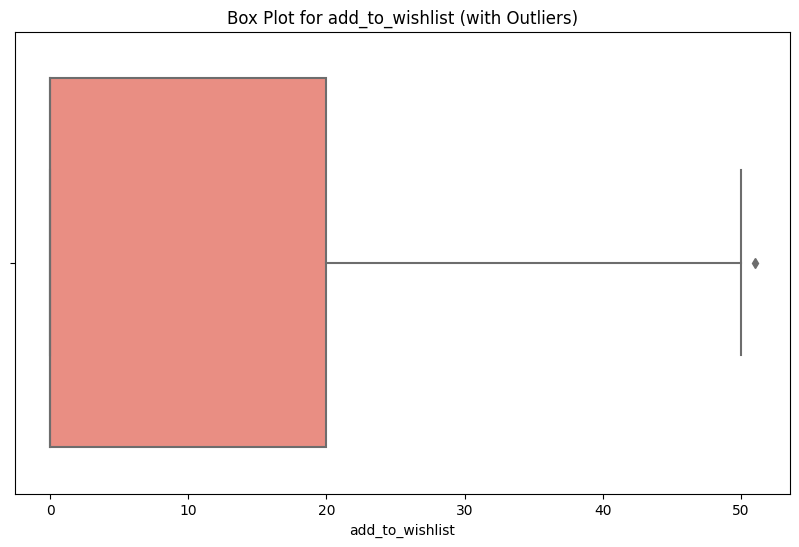

Number of outliers in add_to_wishlist: 1


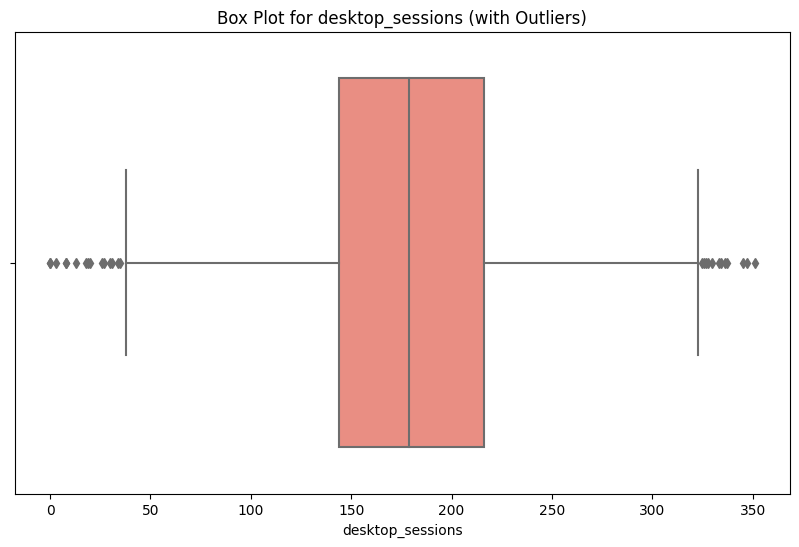

Number of outliers in desktop_sessions: 27


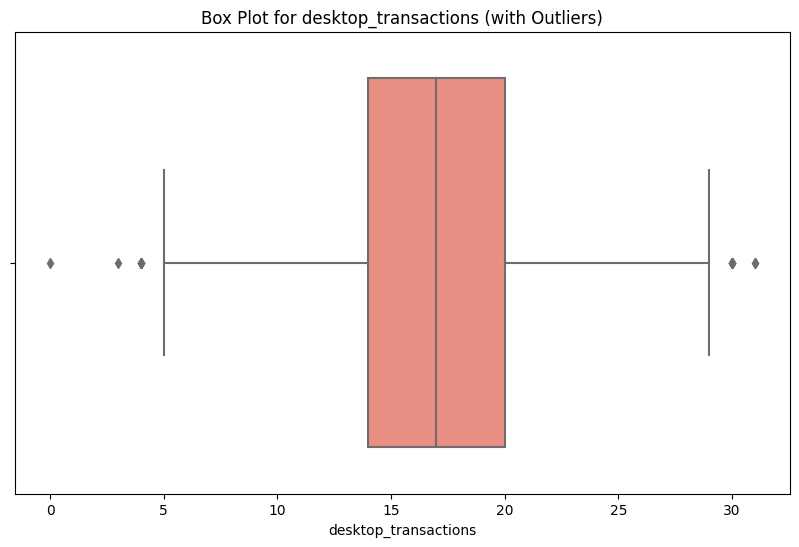

Number of outliers in desktop_transactions: 15


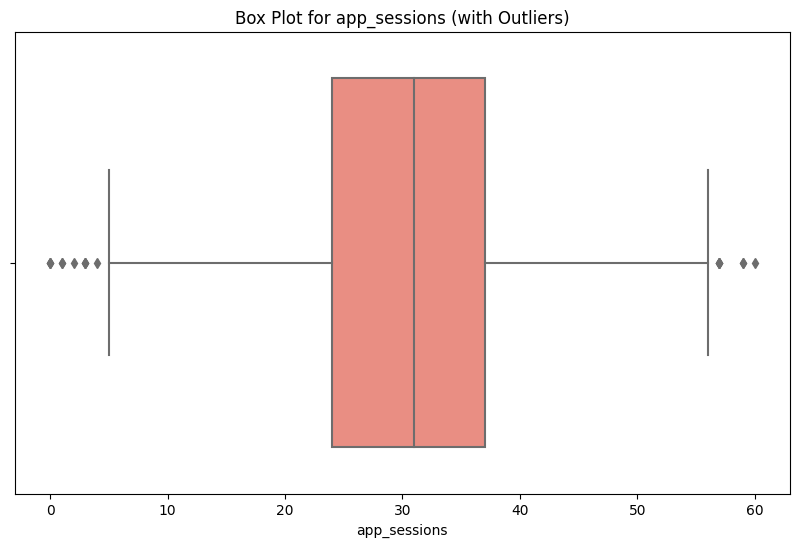

Number of outliers in app_sessions: 17


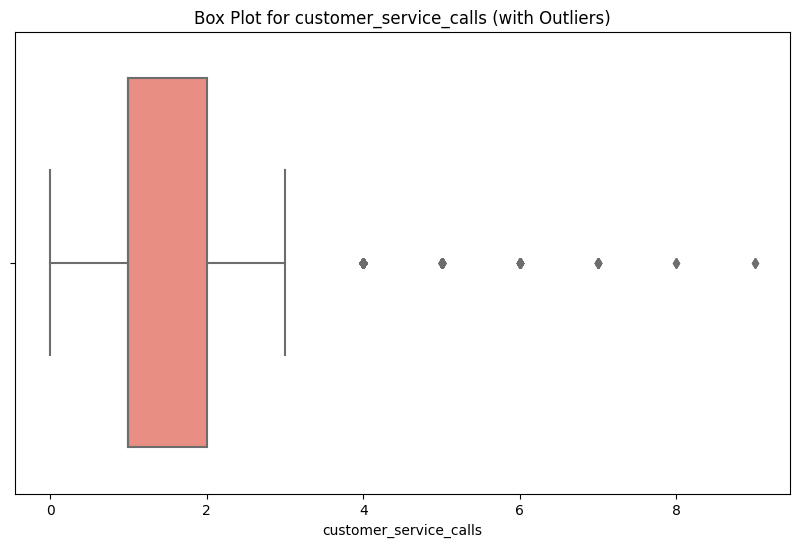

Number of outliers in customer_service_calls: 267


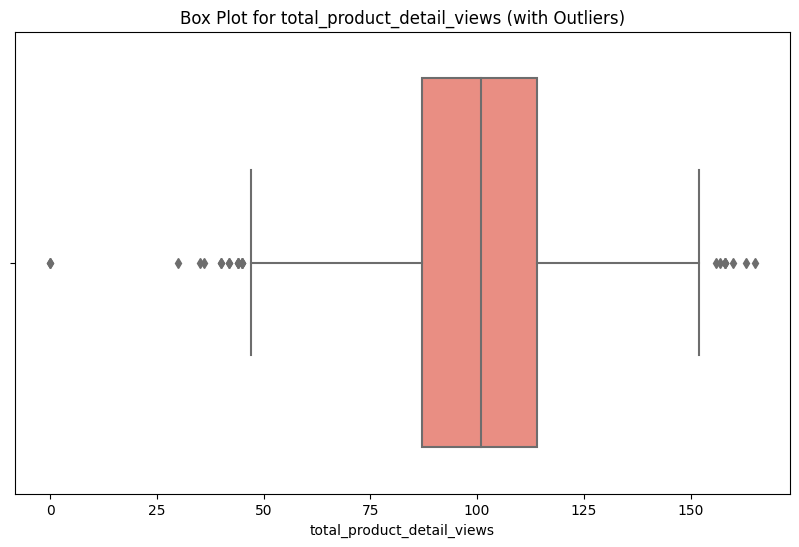

Number of outliers in total_product_detail_views: 23


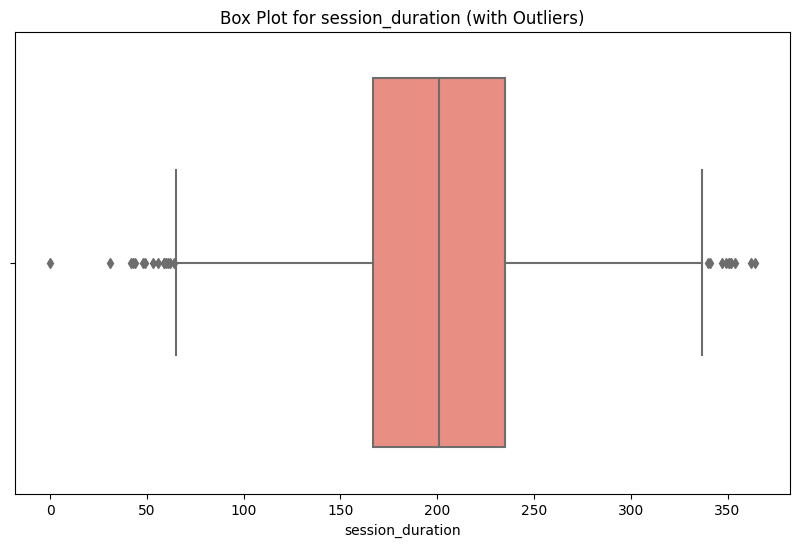

Number of outliers in session_duration: 25


In [16]:
# List of columns with potential outliers
columns_with_outliers = ['avg_order_value', 'promotion_clicks', 'sale_product_views',
                          'app_transactions', 'account_length', 'add_to_wishlist', 'desktop_sessions',
                          'desktop_transactions','app_sessions', 'customer_service_calls','total_product_detail_views',
                          'session_duration']

# Convert selected columns to numeric data types
df[columns_with_outliers] = df[columns_with_outliers].apply(pd.to_numeric, errors='coerce')

for column in columns_with_outliers:
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Create a box plot to visualize outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f"Box Plot for {column} (with Outliers)")
    plt.show()

    # Count the number of outliers
    outliers_count = outliers.shape[0]
    print(f"Number of outliers in {column}:", outliers_count)

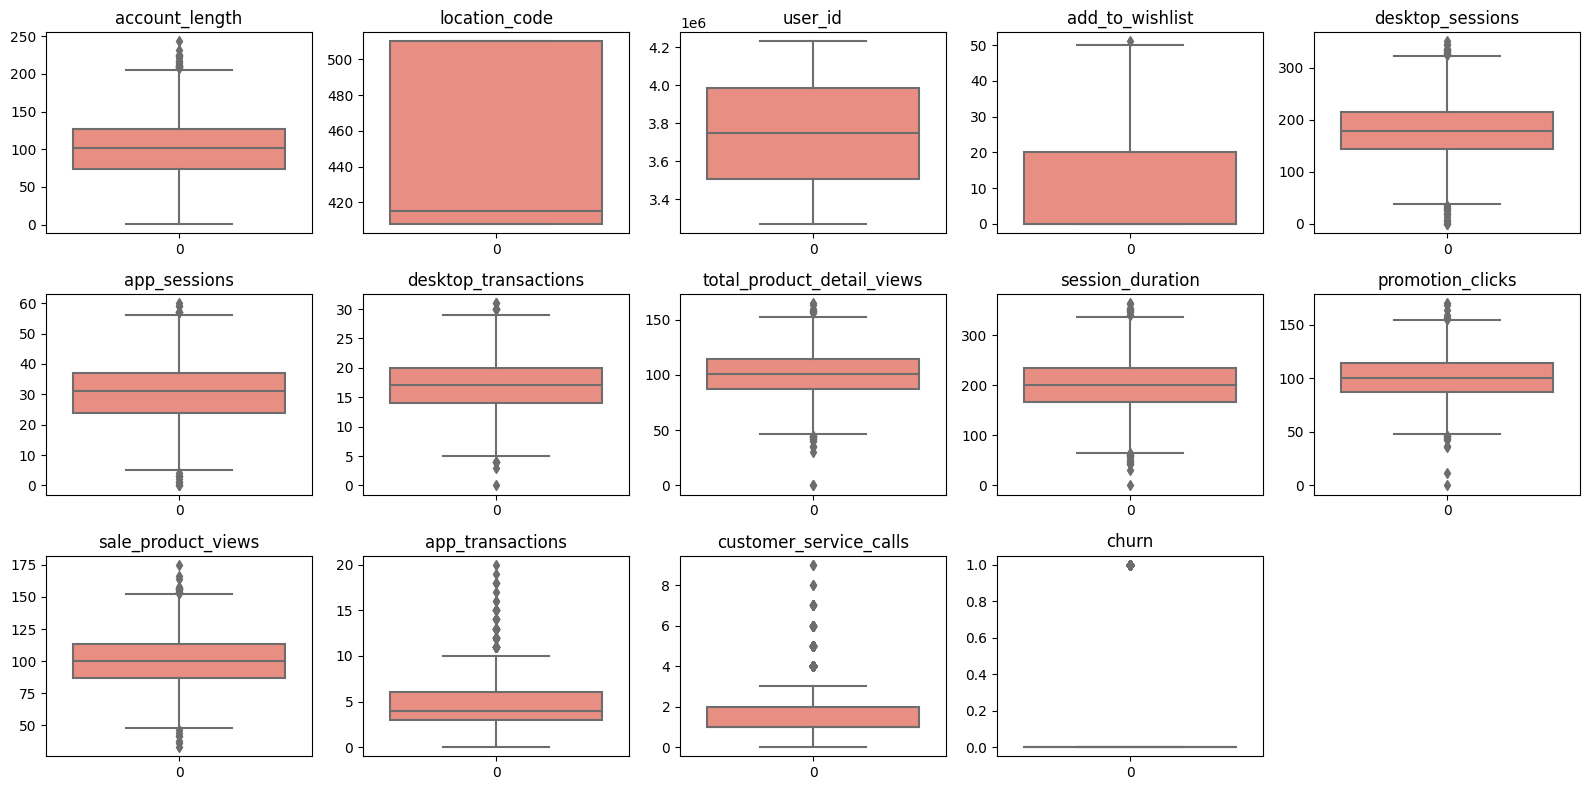

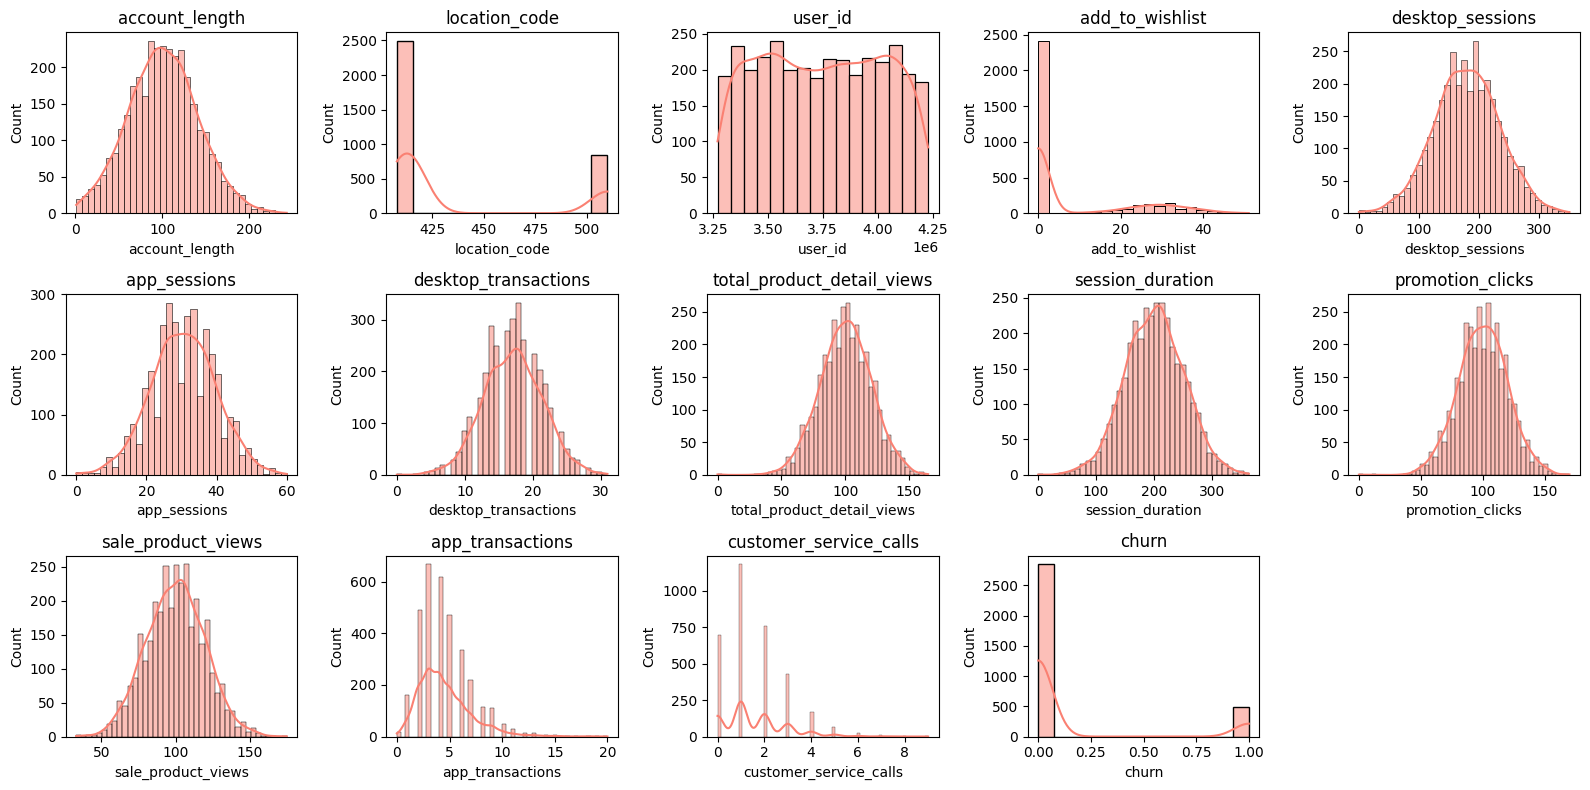

Potential outliers in account_length: 18
Potential outliers in location_code: 0
Potential outliers in user_id: 0
Potential outliers in add_to_wishlist: 1
Potential outliers in desktop_sessions: 27
Potential outliers in app_sessions: 17
Potential outliers in desktop_transactions: 15
Potential outliers in total_product_detail_views: 23
Potential outliers in session_duration: 25
Potential outliers in promotion_clicks: 20
Potential outliers in sale_product_views: 22
Potential outliers in app_transactions: 78
Potential outliers in customer_service_calls: 267
Potential outliers in churn: 483


In [17]:

# Create a list of numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

# Create box plots for numerical columns to visualize outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 5, i+1)
    sns.boxplot(df[col], orient="vertical", color='salmon')
    plt.title(col)
plt.tight_layout()
plt.show()

# Create histograms to visualize the distribution of data
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 5, i+1)
    sns.histplot(df[col], kde=True, color='salmon')
    plt.title(col)
plt.tight_layout()
plt.show()

# Calculate and identify potential outliers using the IQR rule
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Potential outliers in {col}: {len(outliers)}")

7. Conclusions based on visualisations

In [18]:
df2 = df.copy()

## Create a list with the numeric columns
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions','app_sessions', 'desktop_transactions',
                   'total_product_detail_views','session_duration', 'promotion_clicks', 'avg_order_value','sale_product_views',
                   'discount_rate_per_visited_products','product_detail_view_per_app_session', 'app_transactions',
                   'add_to_cart_per_session', 'customer_service_calls']

## Create the outliers list for each numeric column
outliers = []
for i in numeric_columns:
    outliers.extend(df2[(df2[i] < df2[i].mean() - 3*df2[i].std()) | (df2[i] > df2[i].mean() + 3*df2[i].std())].index)

## drop the outliers from the example dataframe
df2.drop(set(outliers),inplace = True)

In [19]:
# compare the example dataframe and the dataframe that includes the true outliers
print(f"The number of observations with True outliers is {len(df.index)} and the number of observations without True outliers is {len(df2.index)}")

The number of observations with True outliers is 3333 and the number of observations without True outliers is 3168


8. Analysis of the Dependent variable (Churn) vs Idependent variables

Until now we've looked into the numeric variables, their missing data, duplicates, distribution, and outliers. A key part of the customer behaviour data is to understand which "behaviours" aka idependent varialbes in our dataset can help us predict customers deciding to stop using the product, aka "churn".

Another variable that we haven't analysed yet is the location code, but we might be able to find value in comparing it with the churn and finding out any potential correlations.

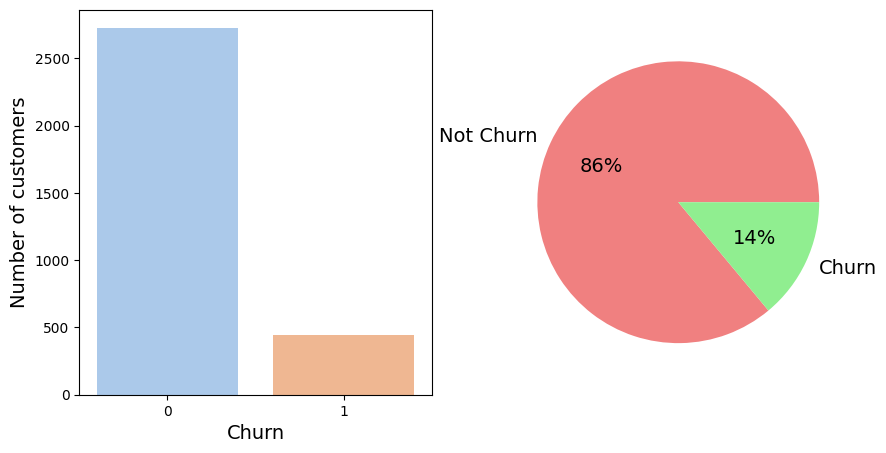

In [20]:
# define subplots
fig, ax = plt.subplots(1,2,figsize= (10,5))

# create the pie plot for the percentage opf churn and not churn customers
plt.pie(df2.churn.value_counts(),labels = ["Not Churn", "Churn"], colors = ["lightcoral", "lightgreen"], autopct='%.0f%%', textprops={'fontsize': 14})

# create a bar plot counting the number of customers that are churn 0 and churn 1
cp = sns.countplot(x=df2['churn'], ax = ax[0], palette = 'pastel')

cp.set_xlabel("Churn", fontsize=14)

cp.set_ylabel("Number of customers", fontsize=14)

plt.show()

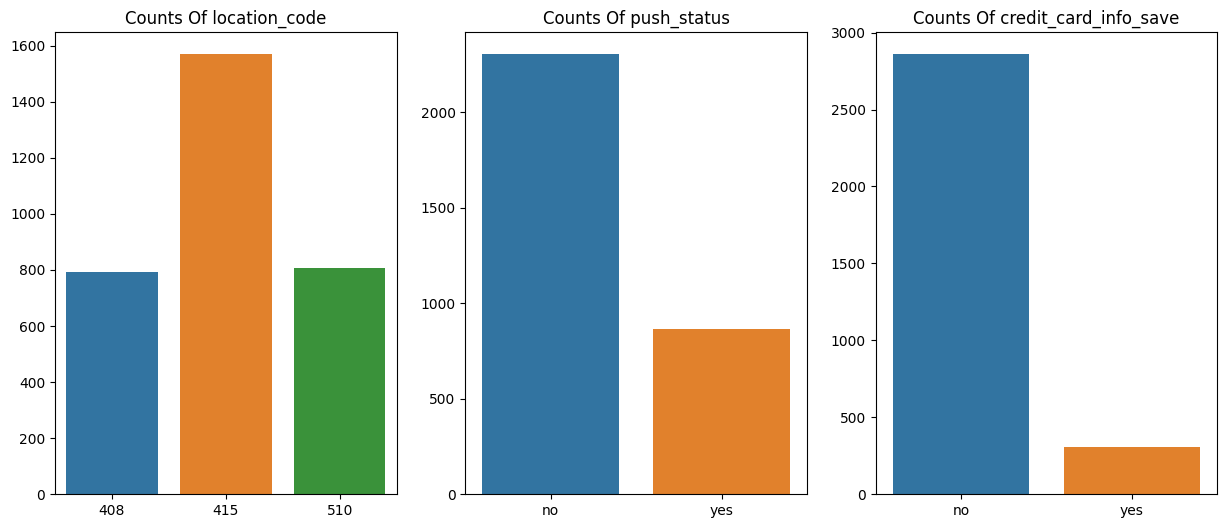

In [21]:
# Define categorical columns
categorical_columns = ["location_code","push_status","credit_card_info_save"]

# transform push status and credit card info to binary format for analysis
for i in df2.select_dtypes(include = ['object']).columns.values:
    df[i] = df2[i].replace(["yes", "no"],[1, 0])

fig, ax = plt.subplots(1, len(categorical_columns), figsize = (15, 6))
for i, a in zip(categorical_columns, ax):
    temp = df2[i].value_counts()
    a.set_title("Counts Of " + str(i))
    sns.barplot(ax = a, x=temp.index, y=temp.values)
plt.show()

9.1 Observations from the categorical columns plots

Majority of customers are in location code 415
Majority of customers don't allow push notifications
Majority of customers don't store their credit card information on the side

9.2 Plot categorical data against the Churn

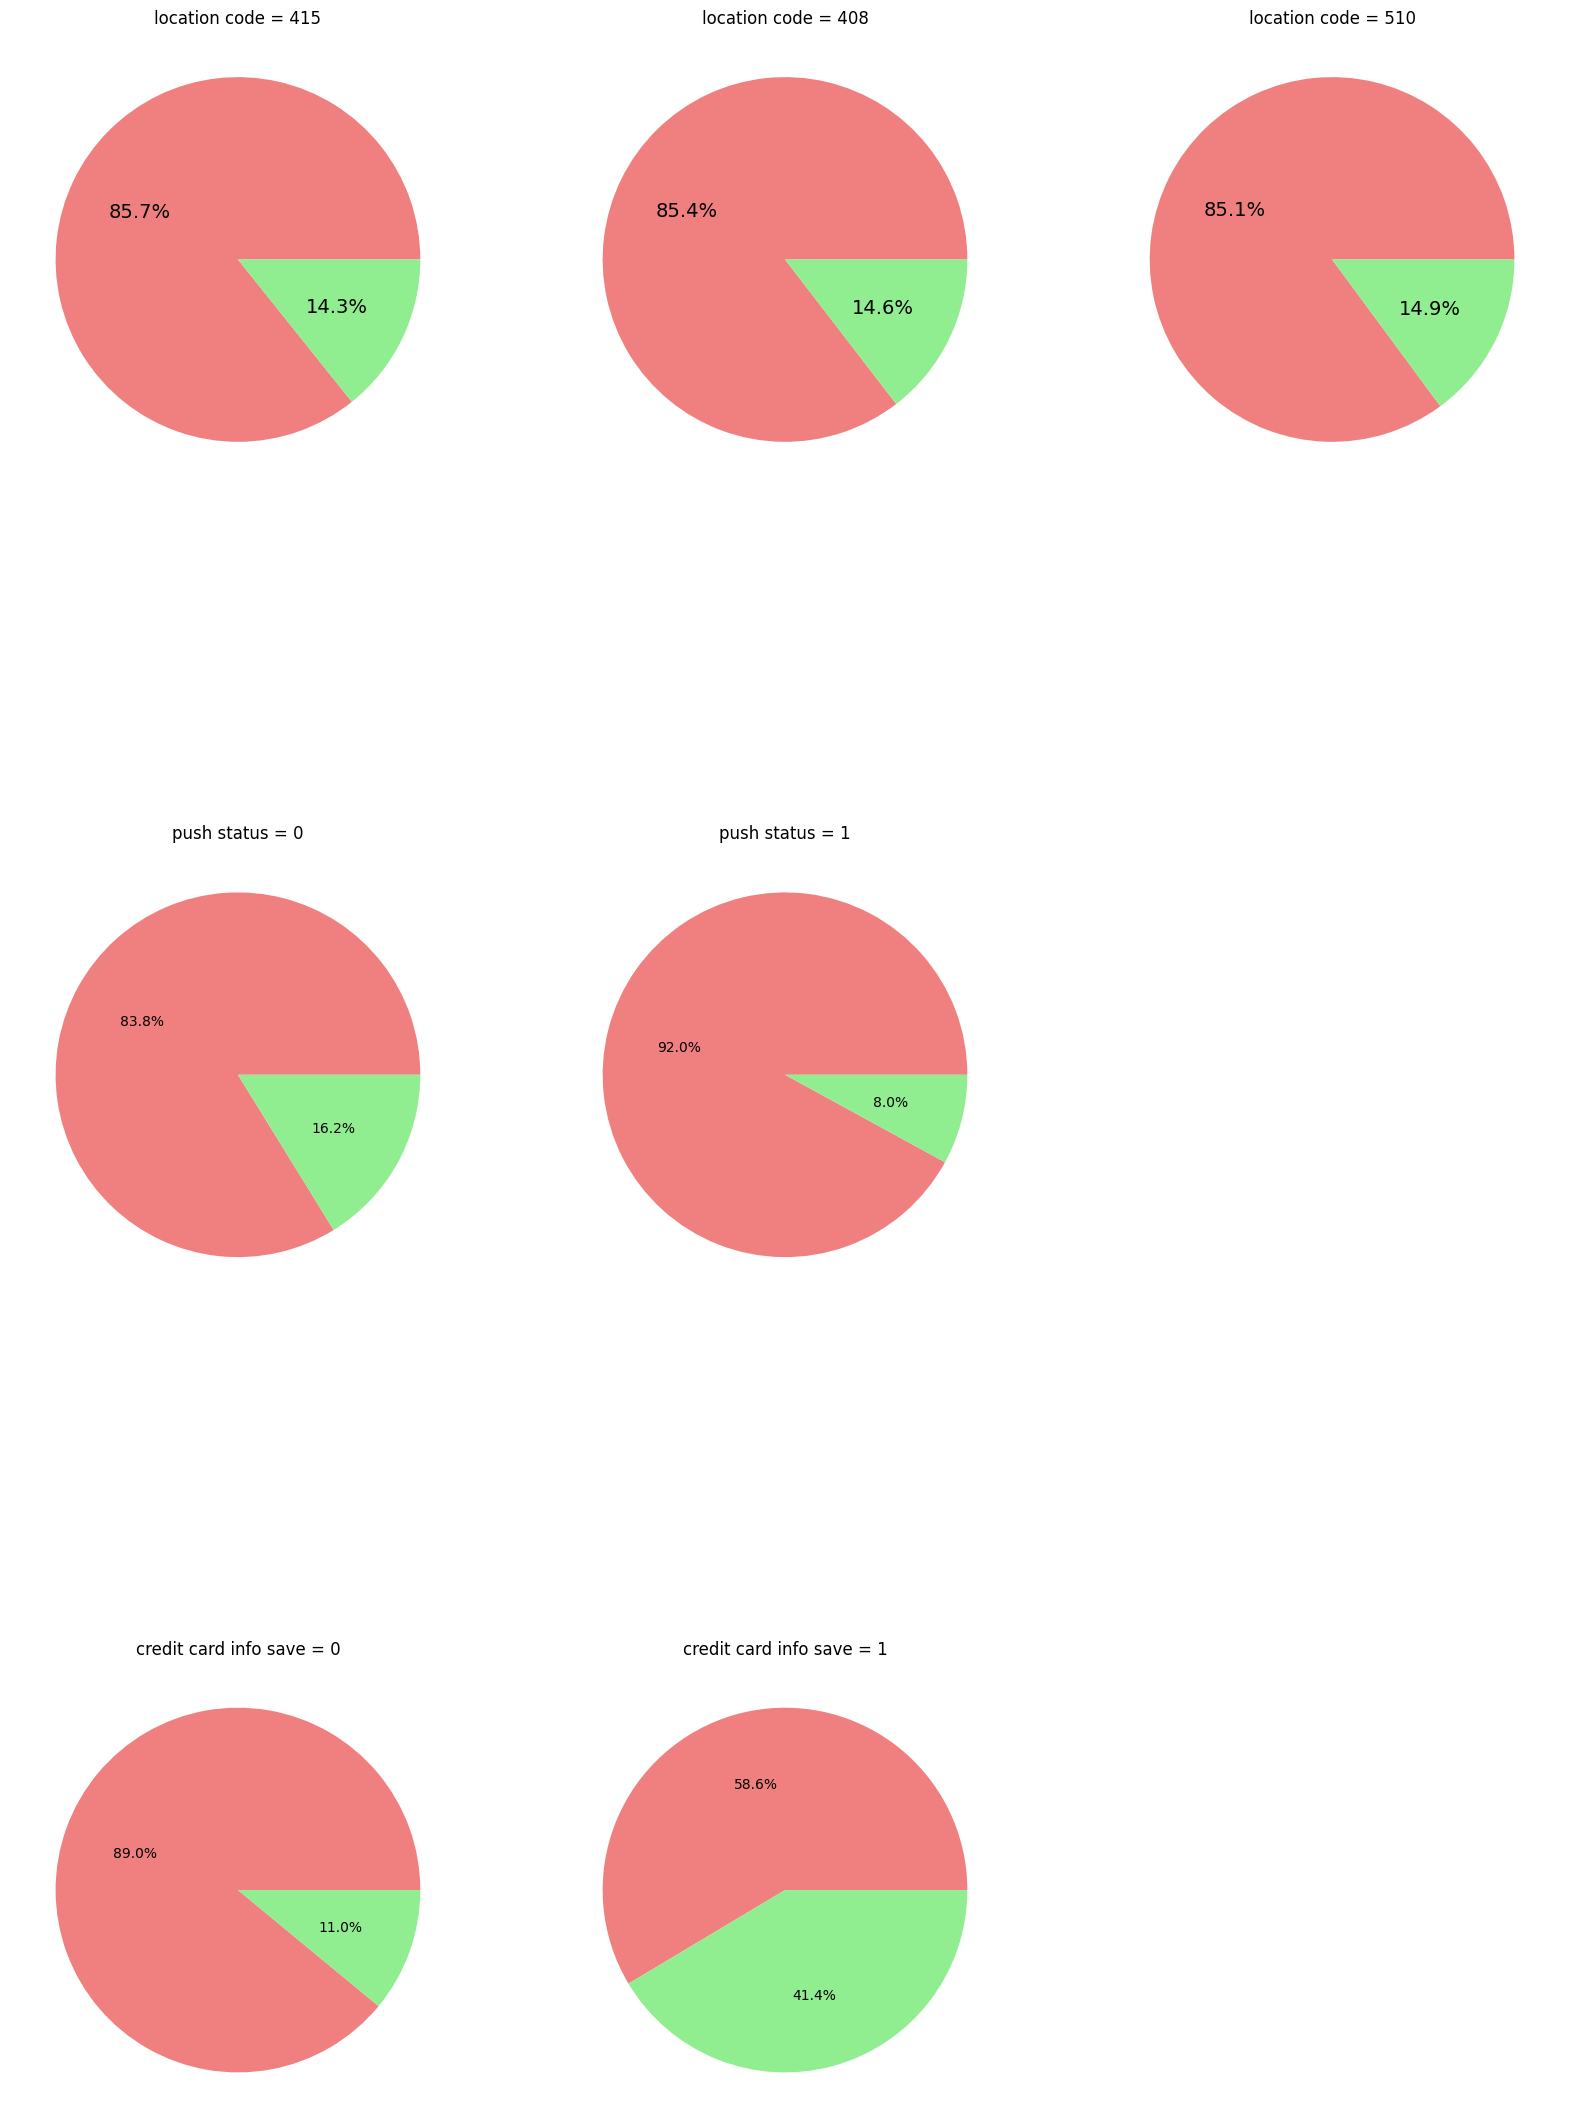

In [26]:
from matplotlib.gridspec import GridSpec


plt.figure(1, figsize=(20, 30))
the_grid = GridSpec(3, 3)

plt.subplot(the_grid[0, 0], aspect=1, title='location code = 415')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[0]].churn.value_counts(),colors = ["lightcoral","lightgreen"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 1], aspect=1, title='location code = 408')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[1]].churn.value_counts(),colors = ["lightcoral","lightgreen"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 2], aspect=1, title='location code = 510')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[2]].churn.value_counts(),colors = ["lightcoral","lightgreen"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 0], aspect=1, title='push status = 0')
source_pie = plt.pie(df[df[categorical_columns[1]] == 0].churn.value_counts(),colors = ["lightcoral","lightgreen"],autopct='%.1f%%',textprops={'fontsize': 10})

plt.subplot(the_grid[1, 1], aspect=1, title='push status = 1')
source_pie = plt.pie(df[df[categorical_columns[1]] == 1].churn.value_counts(),colors = ["lightcoral","lightgreen"],autopct='%.1f%%',textprops={'fontsize': 10})

plt.subplot(the_grid[2, 0], aspect=1, title='credit card info save = 0')
source_pie = plt.pie(df[df[categorical_columns[2]] == 0].churn.value_counts(),colors = ["lightcoral","lightgreen"],autopct='%.1f%%',textprops={'fontsize': 10})

plt.subplot(the_grid[2, 1], aspect=1, title='credit card info save = 1')
source_pie = plt.pie(df[df[categorical_columns[2]] == 1].churn.value_counts(),colors = ["lightcoral","lightgreen"],autopct='%.1f%%',textprops={'fontsize': 10})


plt.show()

9.3 Observations from plotting categorical data against Churn

The percentage of churns for the location codes is similar, suggesting that geography may not be a reliable predictor of churn.
Encouraging consumers to activate push status could potentially reduce the number of churns since clients who have this feature enabled are less likely to be lost.
Consumers who have stored their credit card details on the side are far less likely to be churn than those who have not. This implies that if the store encourages customers to save their credit card information, it may reduce churn.
This makes sense because consumers who trust a brand are also likely to trust their credit card information. Greater trust reduces the likelihood that clients will go elsewhere.
